In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools
import random
import numpy as np


# Force TensorFlow to use GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU.")
    

# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_MobileNetV2.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.01
best_dropout = 0.4
best_batch_size	= 64
best_epochs	= 15

with tf.device('/GPU:0'):
    
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # freeze the base model layers
    base_model.trainable = False
    
    # global pooling and dropout layers included similar to jute pest architecture
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = Dropout(best_dropout)(x)
    
    # final softmax probabilistic classification layer
    output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    optimizer = Adam(learning_rate=best_lr)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Found 6108 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/15
191/191 [==============================] - 30s 111ms/step - loss: 1.1350 - accuracy: 0.6698 - val_loss: 1.0425 - val_accuracy: 0.7182
Epoch 2/15
191/191 [==============================] - 19s 101ms/step - loss: 0.7769 - accuracy: 0.7760 - val_loss: 1.1215 - val_accuracy: 0.7205
Epoch 3/15
191/191 [==============================] - 20s 105ms/step - loss: 0.7891 - accuracy: 0.7962 - val_loss: 1.4230 - val_accuracy: 0.7273
Epoch 4/15
191/191 [==============================] - 21s 110ms/step - loss: 0.7722 - accuracy: 0.8070 - val_loss: 1.6087 - val_accuracy: 0.7091
Epoch 5/15
191/191 [==============================] - 22s 113ms/step - loss: 0.7399 - accuracy: 0.8222 - val_loss: 1.7830 - val_accuracy: 0.7182
Epoch 6/15
191/191 [==========

# Validation plots

14/14 [==============================] - 5s 105ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.697674,0.750000,0.722892,40.000000
american_house_spider,0.909091,0.750000,0.821918,40.000000
bedbug,0.657895,0.625000,0.641026,40.000000
brown_stink_bug,0.756098,0.775000,0.765432,40.000000
carpenter_ant,0.645833,0.775000,0.704545,40.000000
cellar_spider,0.868421,0.825000,0.846154,40.000000
flea,0.458333,0.550000,0.500000,40.000000
house_centipede,0.918919,0.850000,0.883117,40.000000
silverfish,0.852941,0.725000,0.783784,40.000000
subterranean_termite,0.627907,0.675000,0.650602,40.000000


<Figure size 800x600 with 0 Axes>

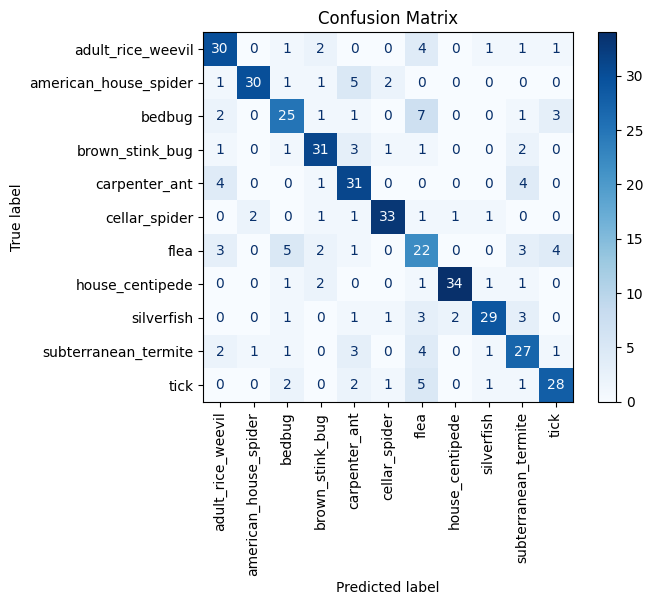

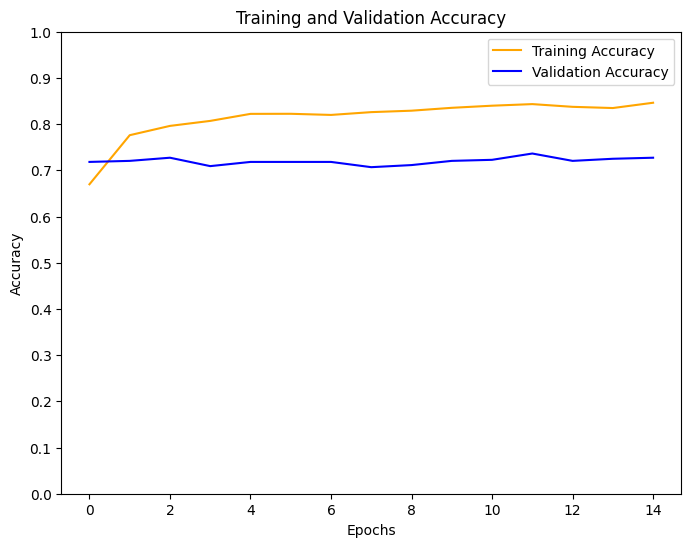

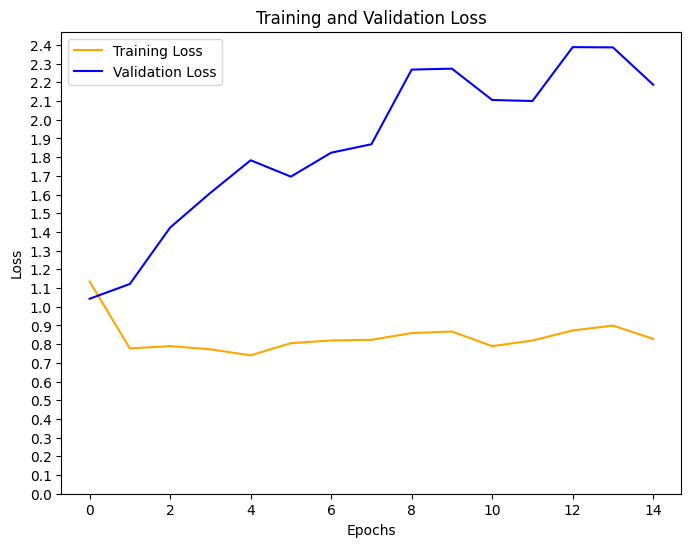

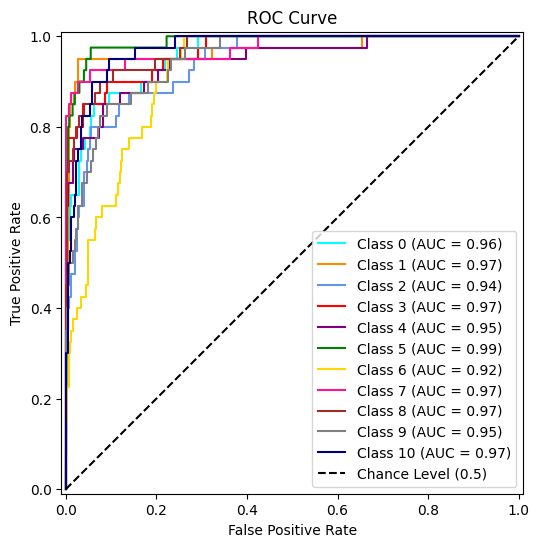

Macro-averaged One-vs-Rest ROC AUC score: 0.96
Accuracy: 0.727
Precision: 0.741
Recall: 0.727
F1 Score: 0.732


{'accuracy': 0.727,
 'precision': 0.741,
 'recall': 0.727,
 'f1_score': 0.732,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.697674  0.750000  0.722892   40.000000
 american_house_spider   0.909091  0.750000  0.821918   40.000000
 bedbug                  0.657895  0.625000  0.641026   40.000000
 brown_stink_bug         0.756098  0.775000  0.765432   40.000000
 carpenter_ant           0.645833  0.775000  0.704545   40.000000
 cellar_spider           0.868421  0.825000  0.846154   40.000000
 flea                    0.458333  0.550000  0.500000   40.000000
 house_centipede         0.918919  0.850000  0.883117   40.000000
 silverfish              0.852941  0.725000  0.783784   40.000000
 subterranean_termite    0.627907  0.675000  0.650602   40.000000
 tick                    0.756757  0.700000  0.727273   40.000000
 accuracy                0.727273  0.727273  0.727273    0.727273
 macro avg               0.740897  

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics:'accuracy': 0.727,'precision': 0.741, 'recall': 0.727,'f1_score': 0.732

# Test plots

7/7 [==============================] - 1s 99ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.789474,0.750000,0.769231,20.000000
american_house_spider,0.941176,0.800000,0.864865,20.000000
bedbug,0.727273,0.800000,0.761905,20.000000
brown_stink_bug,0.818182,0.900000,0.857143,20.000000
carpenter_ant,0.727273,0.800000,0.761905,20.000000
cellar_spider,0.782609,0.900000,0.837209,20.000000
flea,0.541667,0.650000,0.590909,20.000000
house_centipede,0.941176,0.800000,0.864865,20.000000
silverfish,0.933333,0.700000,0.800000,20.000000
subterranean_termite,0.666667,0.700000,0.682927,20.000000


<Figure size 800x600 with 0 Axes>

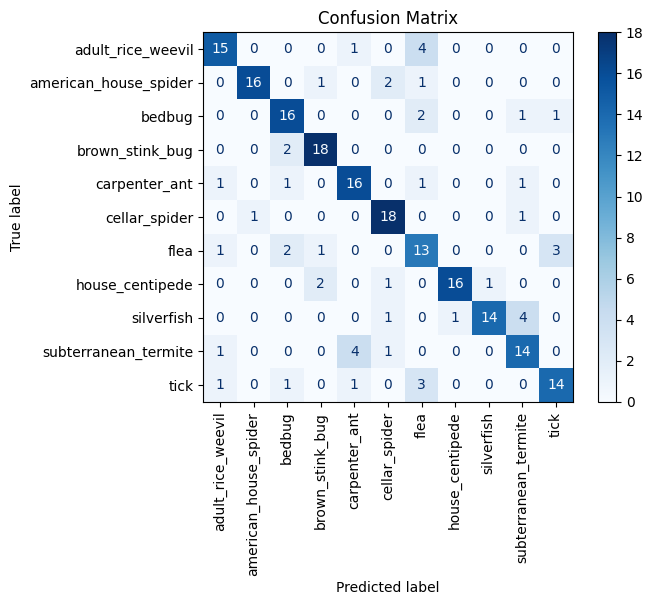

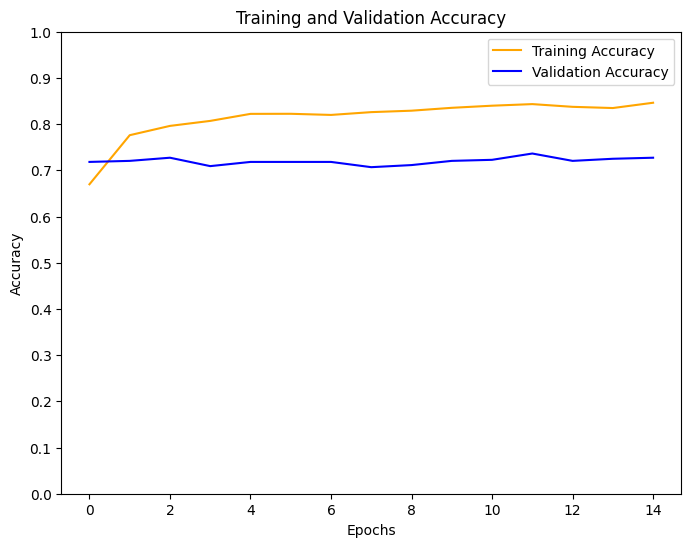

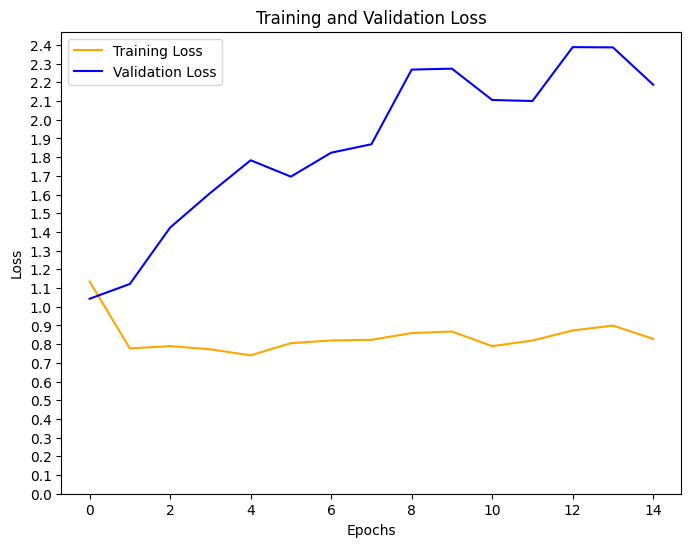

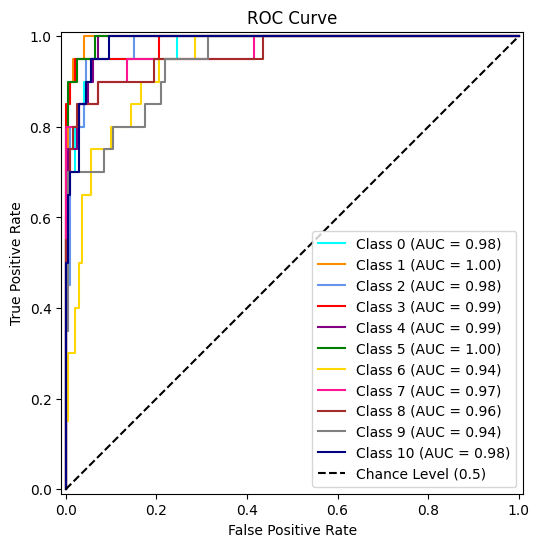

Macro-averaged One-vs-Rest ROC AUC score: 0.97
Accuracy: 0.773
Precision: 0.786
Recall: 0.773
F1 Score: 0.775


{'accuracy': 0.773,
 'precision': 0.786,
 'recall': 0.773,
 'f1_score': 0.775,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.789474  0.750000  0.769231   20.000000
 american_house_spider   0.941176  0.800000  0.864865   20.000000
 bedbug                  0.727273  0.800000  0.761905   20.000000
 brown_stink_bug         0.818182  0.900000  0.857143   20.000000
 carpenter_ant           0.727273  0.800000  0.761905   20.000000
 cellar_spider           0.782609  0.900000  0.837209   20.000000
 flea                    0.541667  0.650000  0.590909   20.000000
 house_centipede         0.941176  0.800000  0.864865   20.000000
 silverfish              0.933333  0.700000  0.800000   20.000000
 subterranean_termite    0.666667  0.700000  0.682927   20.000000
 tick                    0.777778  0.700000  0.736842   20.000000
 accuracy                0.772727  0.772727  0.772727    0.772727
 macro avg               0.786055  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.773, 'precision': 0.786,'recall': 0.773, 'f1_score': 0.775